Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.8849999904632568
Validation accuracy for epoch 2 is: 0.8931999802589417
Validation accuracy for epoch 3 is: 0.9061999917030334
Validation accuracy for epoch 4 is: 0.8838000297546387
Validation accuracy for epoch 5 is: 0.9089999794960022
Validation accuracy for epoch 6 is: 0.9136000275611877
Validation accuracy for epoch 7 is: 0.9132000207901001
Validation accuracy for epoch 8 is: 0.9156000018119812
Validation accuracy for epoch 9 is: 0.9172000288963318
Validation accuracy for epoch 10 is: 0.8960000276565552
Validation accuracy for epoch 11 is: 0.8949999809265137
Validation accuracy for epoch 12 is: 0.9197999835014343
Validation accuracy for epoch 13 is: 0.9147999882698059
Validation accuracy for epoch 14 is: 0.9107999801635742
Validation accuracy for epoch 1

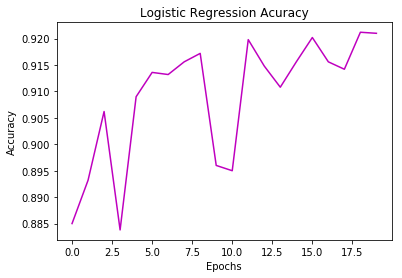

Accuracy for test set: 0.9193000197410583


In [21]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

# read the data and labels as ont-hot vectors
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
y_true = tf.placeholder(tf.float32, [None, 10])

# Definig the model
W = tf.Variable(tf.truncated_normal ([n_input, n_output]))
b = tf.Variable(tf.truncated_normal ([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b) # <-- THIS IS OUR MODEL!

# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

# And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
eta = 0.01
optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
batch_size = 100
n_epochs = 20
l_loss = list()
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels})
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
plt.title('Logistic Regression Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
print("Accuracy for test set: {}". format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               })))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.9190000295639038
Validation accuracy for epoch 2 is: 0.9154000282287598
Validation accuracy for epoch 3 is: 0.9172000288963318
Validation accuracy for epoch 4 is: 0.9187999963760376
Validation accuracy for epoch 5 is: 0.9350000023841858
Validation accuracy for epoch 6 is: 0.9348000288009644
Validation accuracy for epoch 7 is: 0.930400013923645
Validation accuracy for epoch 8 is: 0.9377999901771545
Validation accuracy for epoch 9 is: 0.9453999996185303
Validation accuracy for epoch 10 is: 0.9449999928474426
Validation accuracy for epoch 11 is: 0.9545999765396118
Validation accuracy for epoch 12 is: 0.9549999833106995
Validation accuracy for epoch 13 is: 0.9508000016212463
Validation accuracy for epoch 14 is: 0.9584000110626221
Validation accuracy for epoch 15

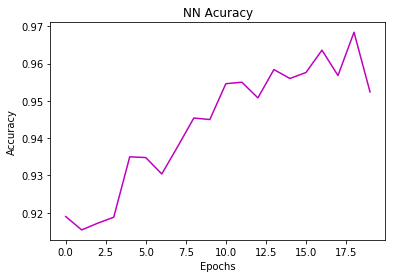

Accuracy for test set: 0.949400007724762


In [29]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

# read the data and labels as ont-hot vectors
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

# Define number of layers
n_input = 784
n_hidden1 = 256
n_hidden2 = 128
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
net_hidden1 = tf.placeholder(tf.float32, [None, n_hidden1])
net_hidden2 = tf.placeholder(tf.float32, [None, n_hidden2])
y_true = tf.placeholder(tf.float32, [None, 10])

# Definig the model => softmax(W2⋅relu(W1⋅x+b1)+b2)
W1 = tf.Variable(tf.truncated_normal ([n_input, n_hidden1]))
W2 = tf.Variable(tf.truncated_normal ([n_hidden1, n_hidden2]))
W3 = tf.Variable(tf.truncated_normal ([n_hidden2, n_output]))
b1 = tf.Variable(tf.truncated_normal ([n_hidden1]))
b2 = tf.Variable(tf.truncated_normal ([n_hidden2]))
b3 = tf.Variable(tf.truncated_normal ([n_output]))
hidden1 = tf.nn.relu(tf.matmul(net_input, W1) + b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)
net_output = tf.matmul(hidden2, W3) + b3

# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

# And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
eta = 0.01
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
batch_size = 100
n_epochs = 20
l_loss = list()
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels})
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
print("Accuracy for test set: {}". format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               })))

In [43]:
import os, sys
from PIL import Image

size = 28, 28
outfolder = "images/resized/"


for file in os.listdir("images"):
    if file.endswith(".jpg"):
        infile = os.path.join("images", file)
        outfile = outfolder+os.path.basename(infile)
        print (outfile)
        if infile != outfile:
            try:
                img = Image.open(infile)
                img = img.resize(size, Image.ANTIALIAS)
                img.save(outfile, "JPEG") 
                

            except IOError:
                print ("cannot create thumbnail for '%s'" % infile)


images/resized/0.jpg
images/resized/1.jpg
images/resized/2.jpg
images/resized/3.jpg
images/resized/4.jpg
images/resized/5.jpg
images/resized/6.jpg
images/resized/7.jpg
images/resized/8.jpg
images/resized/9.jpg


In [27]:
from array import array
import numpy
from PIL import Image, ImageFilter

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva

#x=imageprepare('./image.png')#file path here
#print(len(x))# mnist IMAGES are 28x28=784 pixels

for i in range(0,10):
    img = imageprepare("images/resized/"+ str(i) +".jpg")
    feed_dict = {net_input: [img]}
    prediction=tf.argmax(net_output,1)
    print('i: ', i, ' predict: ', prediction.eval(feed_dict=feed_dict, session=sess))


i:  0  predict:  [7]
i:  1  predict:  [5]
i:  2  predict:  [2]
i:  3  predict:  [3]
i:  4  predict:  [9]
i:  5  predict:  [5]
i:  6  predict:  [6]
i:  7  predict:  [9]
i:  8  predict:  [9]
i:  9  predict:  [9]


In [28]:

    print('i:{0} predicted : {1}'.format(str(i), str(prediction.eval(feed_dict=feed_dict, session=sess)))



IndentationError: unexpected indent (<ipython-input-28-83c841543159>, line 2)

In [9]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A deep MNIST classifier using convolutional layers.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/pros
"""
# Disable linter warnings to maintain consistency with tutorial.
# pylint: disable=invalid-name
# pylint: disable=g-bad-import-order

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import tempfile

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.
  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob


def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def main(_):
    # Import data
    mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
    
    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    
    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])
    
    # Build the graph for the deep net
    y_conv, keep_prob = deepnn(x)
    
    with tf.name_scope('loss'):
      cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                              logits=y_conv)
    cross_entropy = tf.reduce_mean(cross_entropy)
    
    with tf.name_scope('adam_optimizer'):
      optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    
    with tf.name_scope('accuracy'):
      correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
      correct_prediction = tf.cast(correct_prediction, tf.float32)
    accuracy = tf.reduce_mean(correct_prediction)
      
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    batch_size = 100
    n_epochs = 20
    l_loss = list()
    
    for epoch_i in range(n_epochs):
        for batch_i in range(0, mnist.train.num_examples, batch_size):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={
                x: batch_xs,
                y_: batch_ys,
                keep_prob: 0.5})
        loss = sess.run(accuracy, feed_dict={
                         x: mnist.validation.images,
                         y_: mnist.validation.labels,
                         keep_prob: 1.0})
        print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
        l_loss.append(loss)
      
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    plt.title('NN Acuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.plot(l_loss, color='m')
    plt.show()
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    print("Accuracy for test set: {}". format(sess.run(accuracy,
        feed_dict={
        net_input: mnist.test.images,
        y_true: mnist.test.labels
        })))

if __name__ == '__main__':
  tf.app.run(main=main)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


KeyboardInterrupt: 